# Visualisation of results

TODO:
-  calculate trampoline density (both in the grid inteprolation if it matters, and within each image)

In [246]:
import pandas as pd
import pygmt
import matplotlib.pyplot as plt
from pathlib import Path

PROJECTION = "U33R/12c"

## The training and validation sets

In [247]:
# load image coordinates
folder_path = Path('./images/data_3-2022-01-22/')

df = pd.read_csv(folder_path / 'images.txt',  names=["number", "lat", "long", "zoom"])
df.head()

,number,lat,long,zoom
0,0,59.898876,10.550180,19
1,1,59.898876,10.553181,19
2,2,59.898876,10.556181,19
3,3,59.898876,10.559180,19
4,4,59.898876,10.562181,19


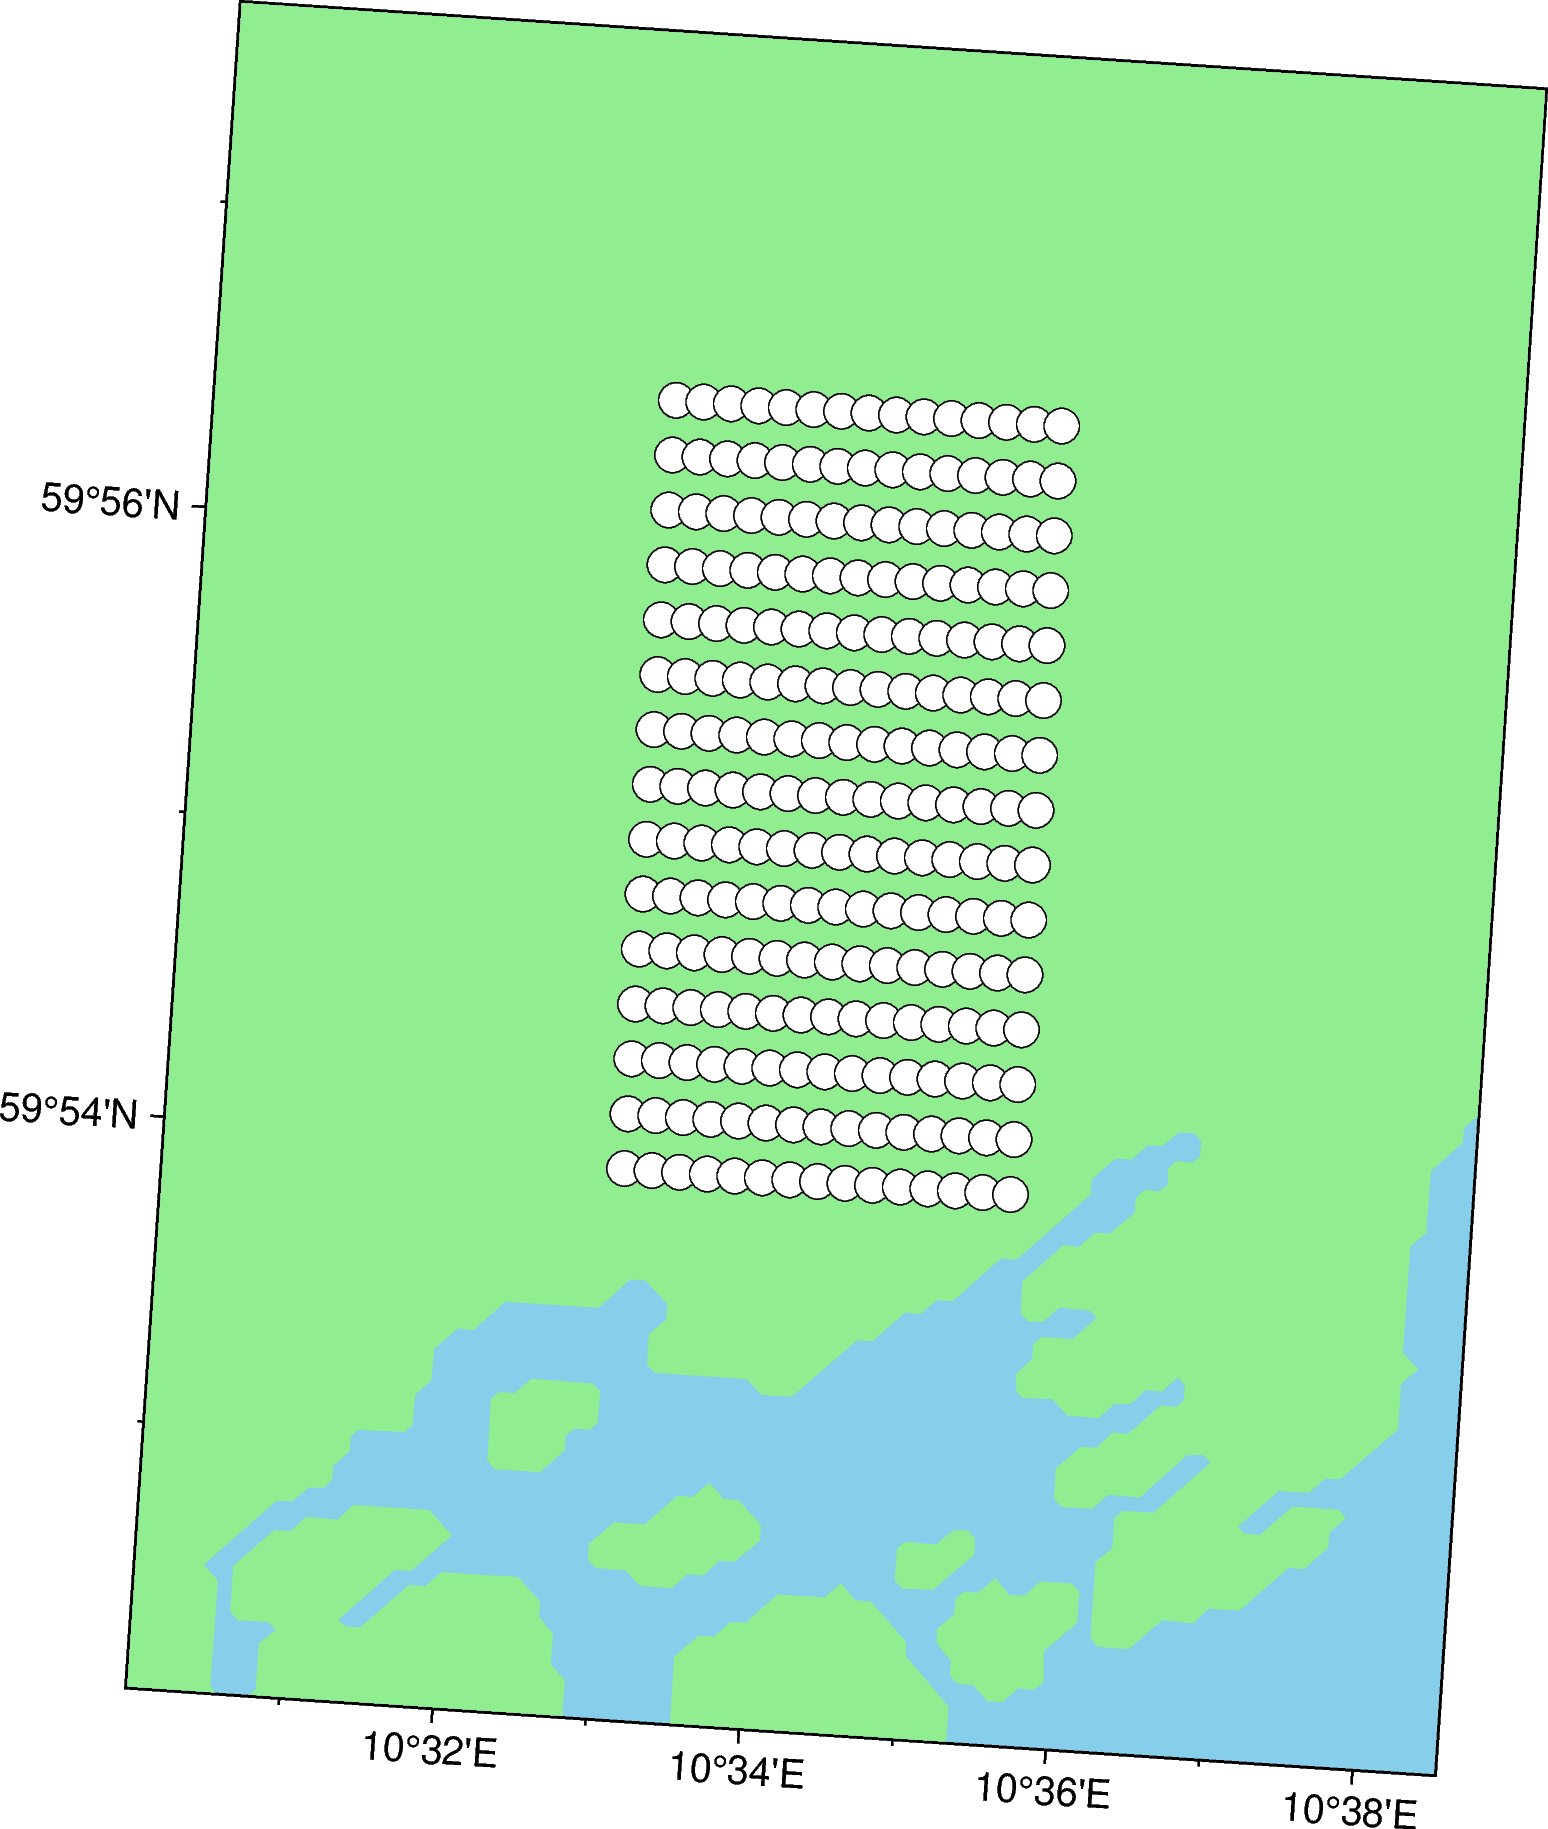

In [248]:
import pygmt

region = [
    df.long.min() - 0.05,
    df.long.max() + 0.05,
    df.lat.min() - 0.03,
    df.lat.max() + 0.02,
]

fig = pygmt.Figure()
fig.basemap(region=region, projection=PROJECTION, frame=True)
fig.coast(land="lightgreen", water="skyblue")
fig.plot(x=df.long, y=df.lat, style="c0.3c", color="white", pen="black")
fig.show()
fig.savefig('./figures/location_map_training_validation.png', dpi=400)

In [249]:
# read label data

# Load
import os
from pathlib import Path
import numpy as np

text_files = [f for f in os.listdir(folder_path) if f.endswith('gmaps.txt')]
print(text_files[:5])

columns = ['Number', 'X', 'Y', 'Width', "Height", 'Filepath']
df = pd.DataFrame(columns = columns)

for tf in text_files:
    df_new = pd.read_csv(folder_path / tf, sep=' ', names=['Number', 'X', 'Y', 'Width', "Height"])
    df_new['Filepath'] = tf
    df = pd.concat([df, df_new])

print(df.head())
print(f"Data for {df.Filepath.nunique()} images containing a trampoline")

['100_gmaps.txt', '104_gmaps.txt', '105_gmaps.txt', '106_gmaps.txt', '107_gmaps.txt']
  Number         X         Y     Width    Height       Filepath
0      0  0.726562      0.85    0.0375   0.03125  100_gmaps.txt
0      0  0.342187  0.577344   0.04375  0.045312  104_gmaps.txt
1      0  0.807031  0.421875  0.057813    0.0625  104_gmaps.txt
2      0  0.809375  0.032031      0.05  0.048438  104_gmaps.txt
3      0  0.251563  0.794531  0.046875  0.051562  104_gmaps.txt
Data for 110 images containing a trampoline


In [250]:
# Get coords of each image because this data isn't un the detect folder labels
image_data_filepath = folder_path / "images.txt"

df_coords = pd.read_csv(image_data_filepath,  names=["number", "lat", "long", "zoom"])

df_coords['Filepath'] = df_coords['number'].astype(str) + "_gmaps.txt"

print(f"Coordinates data for {len(df_coords)} images")

# get number of trampolines (number of times filepath appears in df)
df_counts = pd.DataFrame(df['Filepath'].value_counts().reset_index())
df_counts.columns = ['Filepath', 'count']

# merge coordinate and trampoline number dataframes
df = pd.merge(df_counts, df_coords, on='Filepath')
print(f"Trampoline counts data for {len(df)} images")
df.head()

Coordinates data for 225 images
Trampoline counts data for 110 images


,Filepath,count,number,lat,long,zoom
0,18_gmaps.txt,7,18,59.901875,10.559180,19
1,50_gmaps.txt,5,50,59.907875,10.565181,19
2,123_gmaps.txt,5,123,59.922874,10.559180,19
3,73_gmaps.txt,4,73,59.910877,10.589181,19
4,119_gmaps.txt,4,119,59.919876,10.592180,19


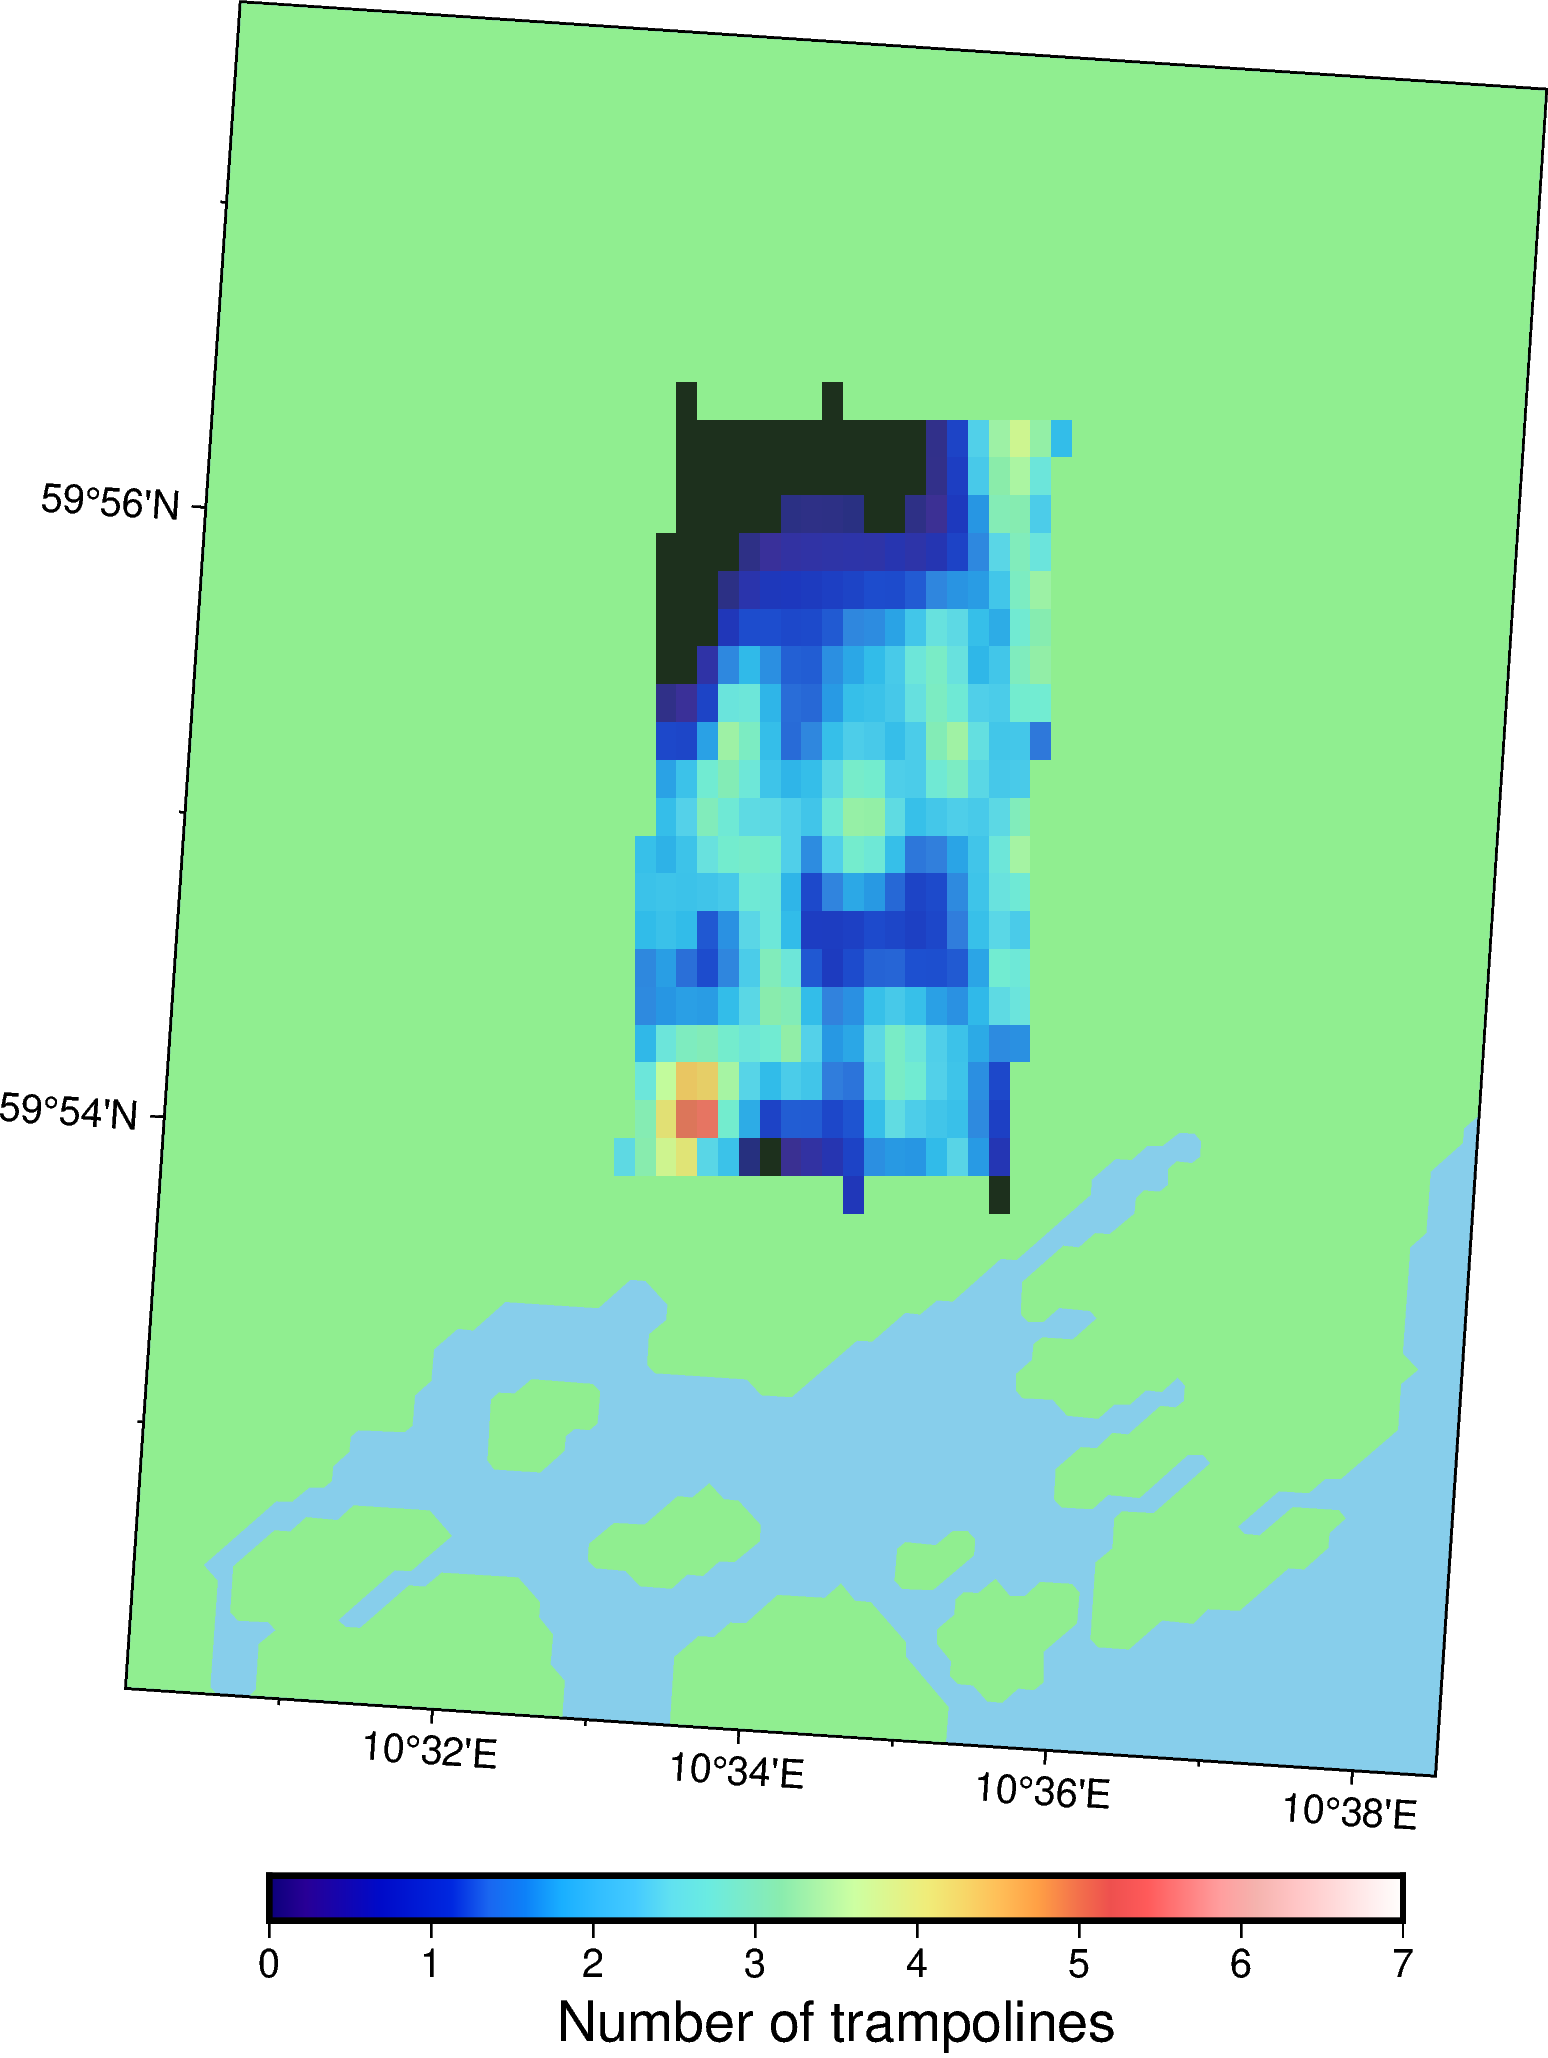

<Figure size 432x288 with 0 Axes>

In [251]:
#pygmt.sph2grd(data=df[['lat', 'long']])
local_region = [df['long'].min(), df['long'].max(), df['lat'].min(), df['lat'].max()]

trampoline_surface = pygmt.surface(data=df[['long', 'lat', 'count']], region=local_region, spacing=0.002)

fig = pygmt.Figure()
fig.basemap(region=region, projection="U33R/12c", frame=True)
fig.coast(land="lightgreen", water="skyblue")
pygmt.makecpt(cmap="haxby", series=[0, df['count'].max()])
fig.grdimage(trampoline_surface, nan_transparent=True, transparency=20)
fig.colorbar(frame=["a1f1", 'x+l"Number of trampolines"', "y"])
#fig.plot(x=df.long, y=df.lat, style="c0.3c", color="white", pen="black")
plt.tight_layout()
fig.show()
fig.savefig('./figures/trampoline_map_training_validation.png', dpi=400)

The above fits with the area - residential areas have the most trampolines

<img src=".\resources\training_set_satellite.png" alt="Satellite images over training set" style="width: 500px;"/>

## The test set

In [112]:
# load image coordinates
df = pd.read_csv('./data/test/images.txt',  names=["number", "lat", "long", "zoom"])
df.head()

,number,lat,long,zoom
0,25,59.937172,10.807871,NaN
1,26,59.937172,10.810871,NaN
2,27,59.937172,10.813871,NaN
3,28,59.937172,10.816872,NaN
4,29,59.937172,10.819871,NaN


[10.707870864868164, 10.845871292114257, 59.887171936035166, 59.97416854858398]
   number        lat       long  zoom
0      25  59.937172  10.807871   NaN
1      26  59.937172  10.810871   NaN
2      27  59.937172  10.813871   NaN
3      28  59.937172  10.816872   NaN
4      29  59.937172  10.819871   NaN


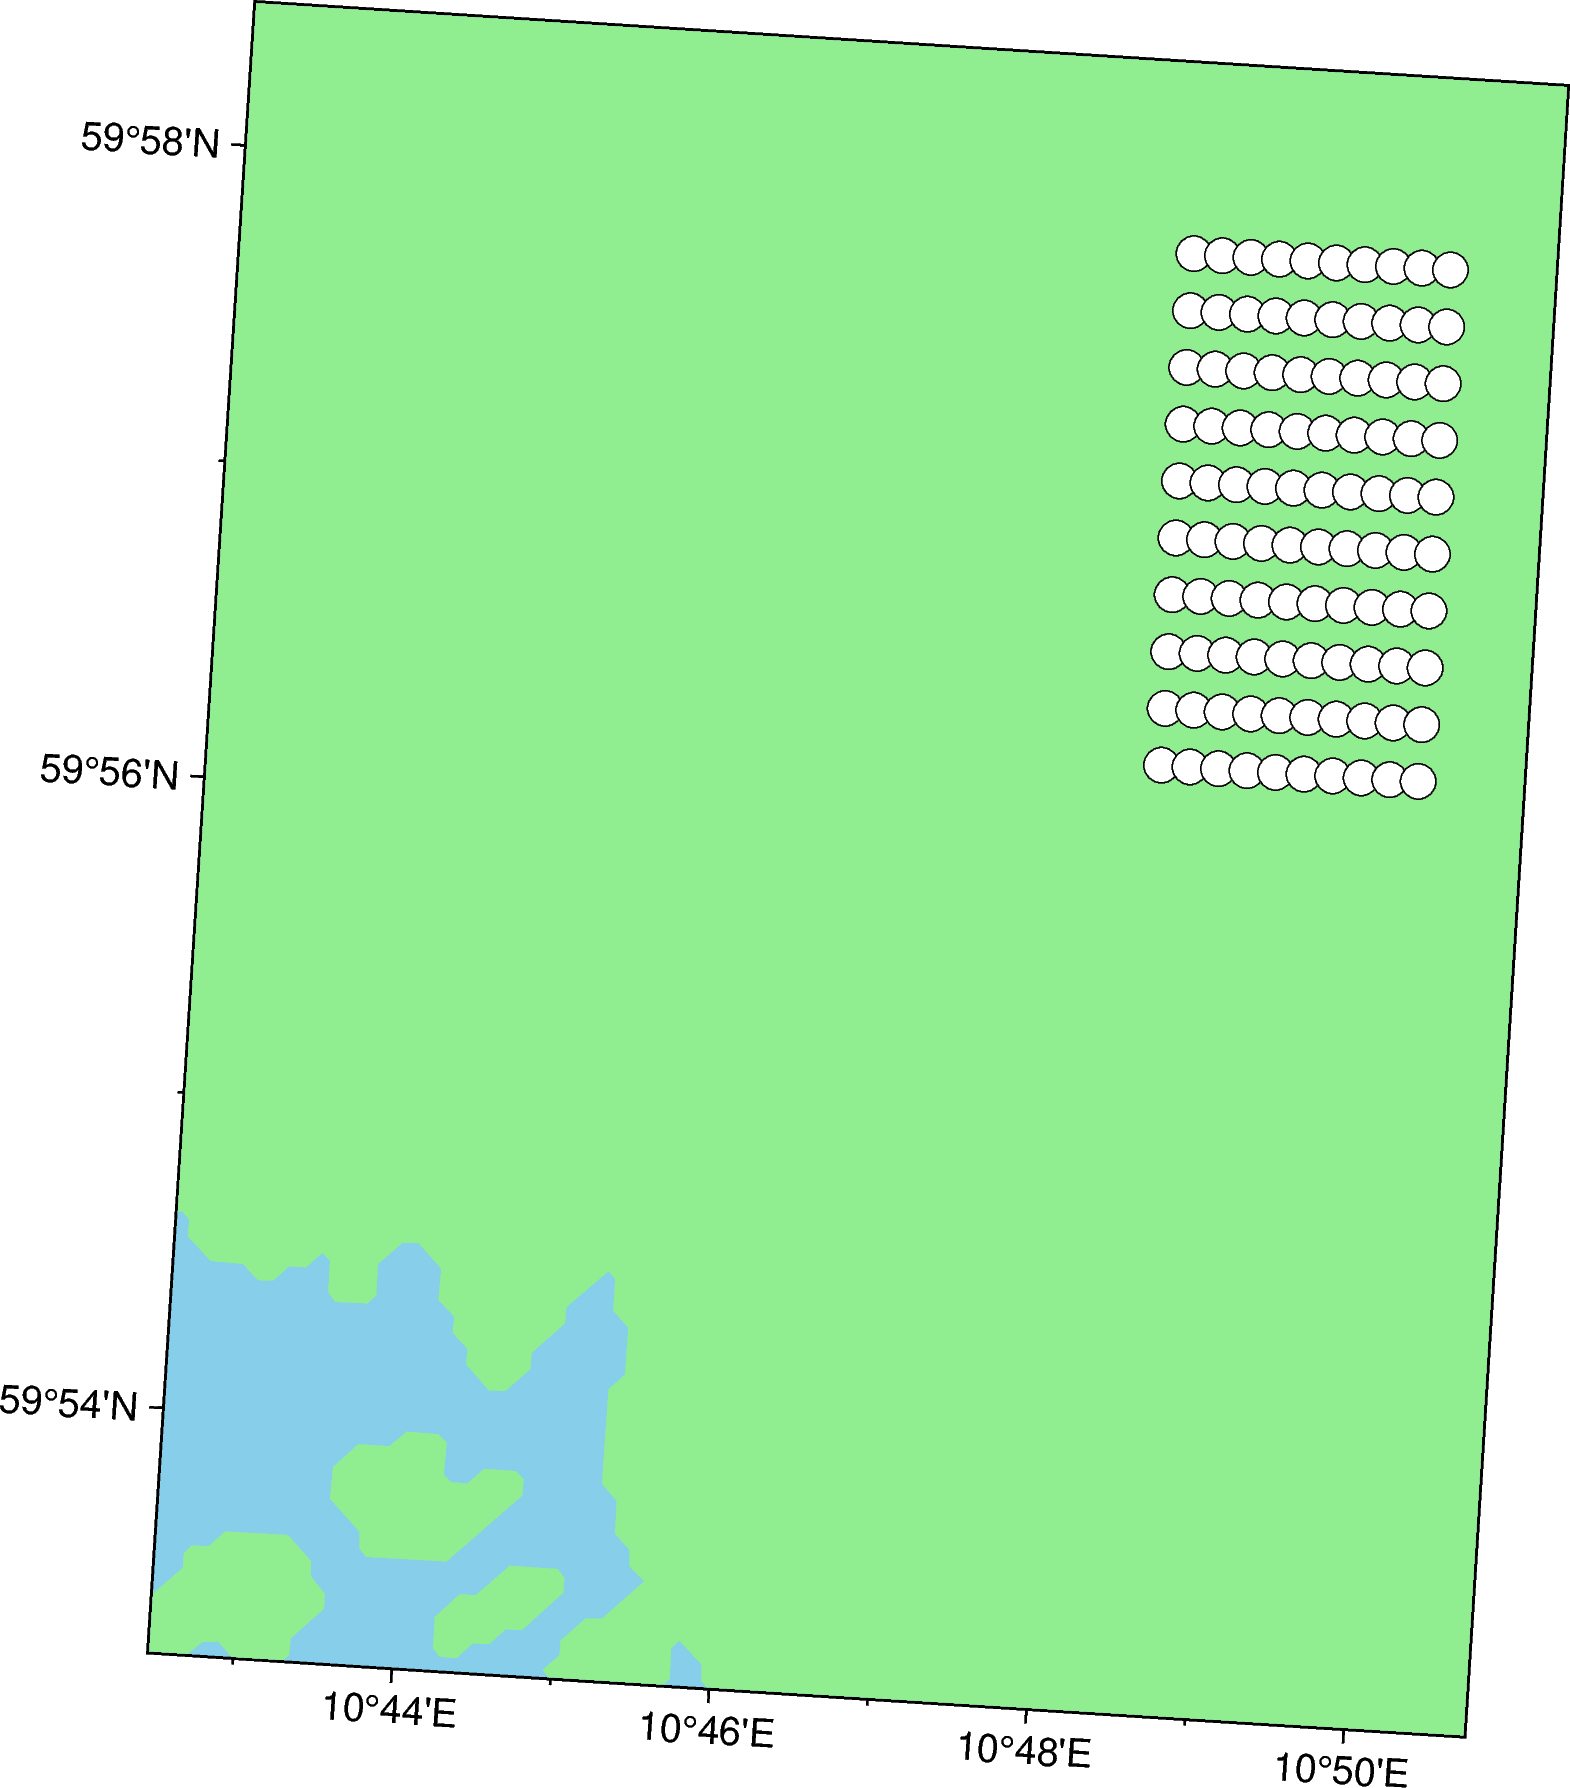

In [113]:
import pygmt

region = [
    df.long.min() - 0.1,
    df.long.max() + 0.011,
    df.lat.min() - 0.05,
    df.lat.max() + 0.01,
]

print(region)
print(df.head())

fig = pygmt.Figure()
fig.basemap(region=region, projection=PROJECTION, frame=True)
fig.coast(land="lightgreen", water="skyblue")
fig.plot(x=df.long, y=df.lat, style="c0.3c", color="white", pen="black")
fig.show()
fig.savefig('./figures/map.png', dpi=400)


In [114]:
# Load
import os
from pathlib import Path
import numpy as np

labels_path = Path(r"C:\Users\lug\Documents\Code\trampolines\yolov5\runs\detect\exp8\labels")

text_files = [f for f in os.listdir(labels_path) if f.endswith('.txt')]
print(text_files[:5])

columns = ['Number', 'X', 'Y', 'Width', "Height", 'Filepath']
df = pd.DataFrame(columns = columns)

for tf in text_files:
    df_new = pd.read_csv(labels_path / tf, sep=' ', names=['Number', 'X', 'Y', 'Width', "Height"])
    df_new['Filepath'] = tf
    df = pd.concat([df, df_new])

print(df.head())

['100_gmaps.txt', '101_gmaps.txt', '102_gmaps.txt', '105_gmaps.txt', '106_gmaps.txt']
  Number         X         Y     Width    Height       Filepath
0      0  0.978906   0.81875  0.042188      0.05  100_gmaps.txt
0      0  0.721094  0.873438  0.042188   0.03125  101_gmaps.txt
1      0  0.054688  0.171875  0.040625  0.040625  101_gmaps.txt
2      0  0.522656  0.688281  0.045312  0.048438  101_gmaps.txt
3      0  0.128906  0.140625  0.045312   0.04375  101_gmaps.txt


In [115]:
# Get coords of each image because this data isn't un the detect folder labels
image_data_filepath = Path(r"C:\Users\lug\Documents\Code\trampolines\images\data_2022-02-12\images.txt")

df_coords = pd.read_csv(image_data_filepath,  names=["number", "lat", "long", "zoom"])

df_coords['Filepath'] = df_coords['number'].astype(str) + "_gmaps.txt"
df_coords.head()


,number,lat,long,zoom,Filepath
0,0,59.914173,10.639071,19,0_gmaps.txt
1,1,59.914173,10.642071,19,1_gmaps.txt
2,2,59.914173,10.645071,19,2_gmaps.txt
3,3,59.914173,10.648070,19,3_gmaps.txt
4,4,59.914173,10.651071,19,4_gmaps.txt


In [117]:
df_counts = pd.DataFrame(df['Filepath'].value_counts().reset_index())
df_counts.columns = ['Filepath', 'count']
print(df_counts)

df = pd.merge(df_counts, df_coords, on='Filepath')
df.head()

          Filepath  count
0    135_gmaps.txt      9
1    210_gmaps.txt      6
2    101_gmaps.txt      5
3    211_gmaps.txt      5
4     30_gmaps.txt      4
..             ...    ...
110   44_gmaps.txt      1
111  140_gmaps.txt      1
112  105_gmaps.txt      1
113  106_gmaps.txt      1
114   99_gmaps.txt      1

[115 rows x 2 columns]


,Filepath,count,number,lat,long,zoom
0,135_gmaps.txt,9,135,59.941174,10.639071,19
1,210_gmaps.txt,6,210,59.956173,10.639071,19
2,101_gmaps.txt,5,101,59.932171,10.672071,19
3,211_gmaps.txt,5,211,59.956173,10.642071,19
4,30_gmaps.txt,4,30,59.920174,10.639071,19


[10.539070510864258, 10.692070327758787, 59.867171478271494, 59.96617294311523]
        Filepath  count  number        lat       long  zoom
0  135_gmaps.txt      9     135  59.941174  10.639071    19
1  210_gmaps.txt      6     210  59.956173  10.639071    19
2  101_gmaps.txt      5     101  59.932171  10.672071    19
3  211_gmaps.txt      5     211  59.956173  10.642071    19
4   30_gmaps.txt      4      30  59.920174  10.639071    19


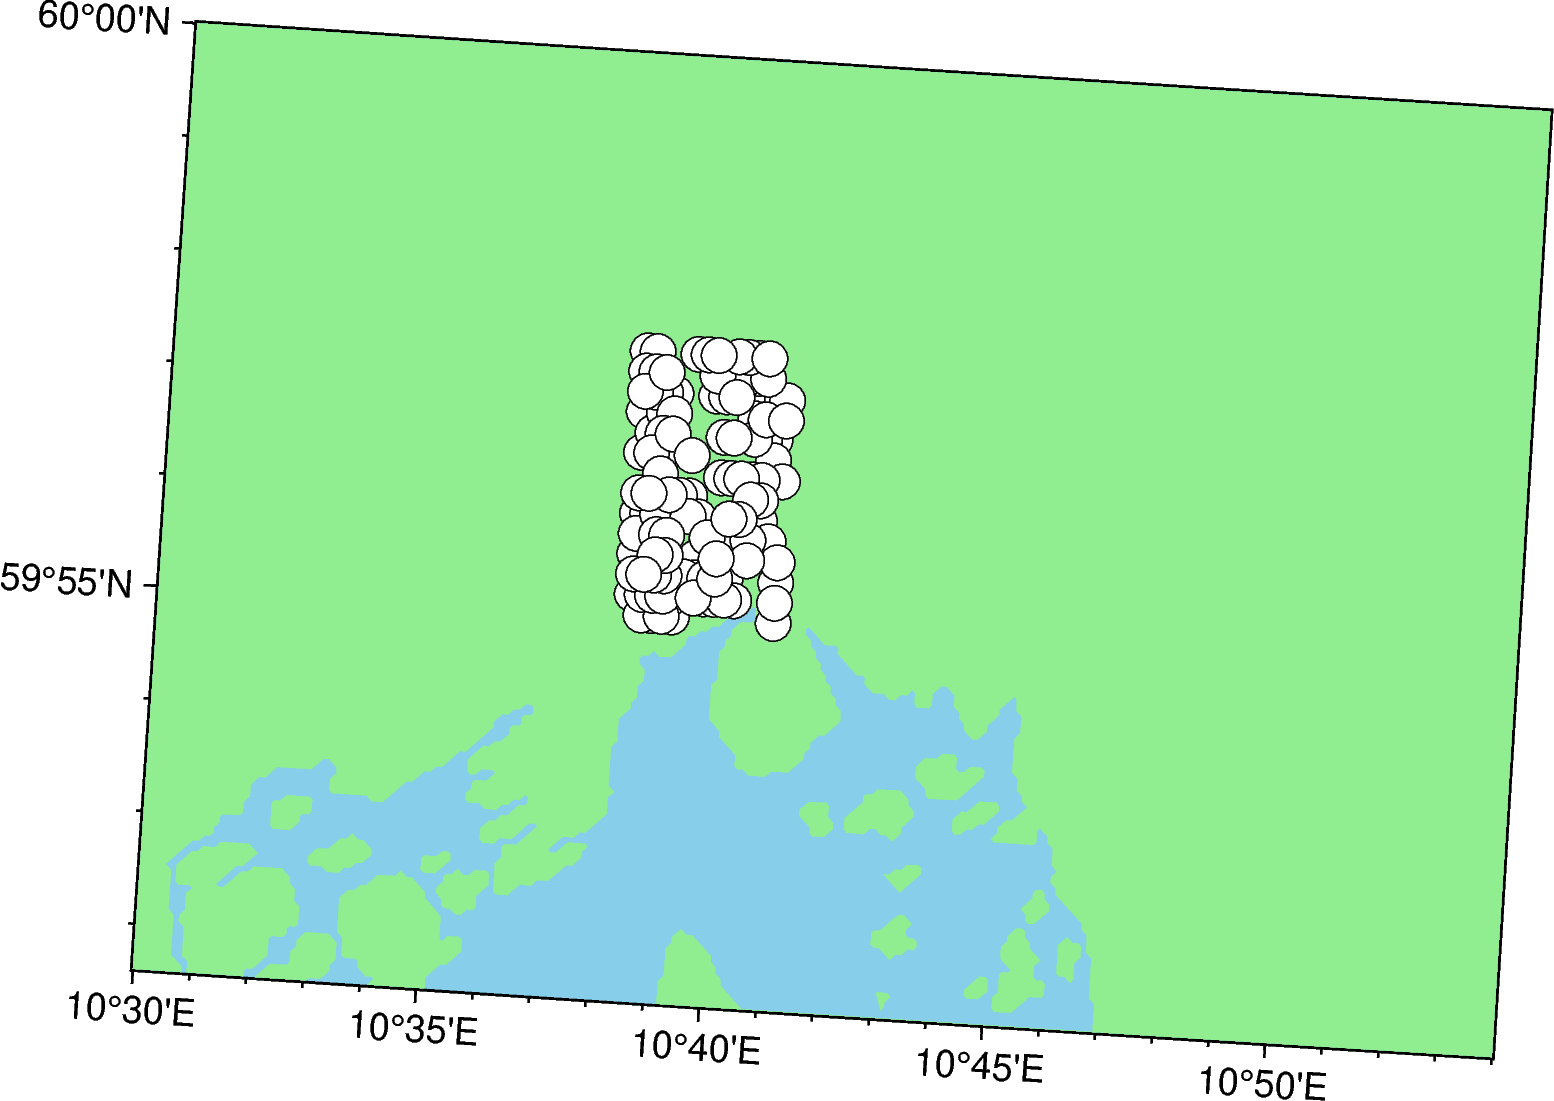

<Figure size 432x288 with 0 Axes>

In [126]:
region_oslo = [10.5, 
        10.9,
        59.86,
        60]


print(region)
print(df.head())

fig = pygmt.Figure()
fig.basemap(region=region_oslo, projection=PROJECTION, frame=True)
fig.coast(land="lightgreen", water="skyblue")
fig.plot(x=df.long, y=df.lat, style="c0.3c", color="white", pen="black")
plt.tight_layout()
fig.show()
fig.savefig('./figures/map.png', dpi=400)


C:\Users\lug\Anaconda3\envs\yolo5env\lib\site-packages\pygmt\helpers\decorators.py:873: SyntaxWarning: Short-form parameter (I) is not recommended. Use long-form parameter 'spacing' instead.
  return module_func(*args, **kwargs)
C:\Users\lug\Anaconda3\envs\yolo5env\lib\site-packages\pygmt\helpers\decorators.py:873: SyntaxWarning: Short-form parameter (R) is not recommended. Use long-form parameter 'region' instead.
  return module_func(*args, **kwargs)
surface [WARNING]: (x_max-x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
surface [WARNING]: (y_max-y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
surface (gmtapi_init_grdheader): Please select compatible -R and -I values


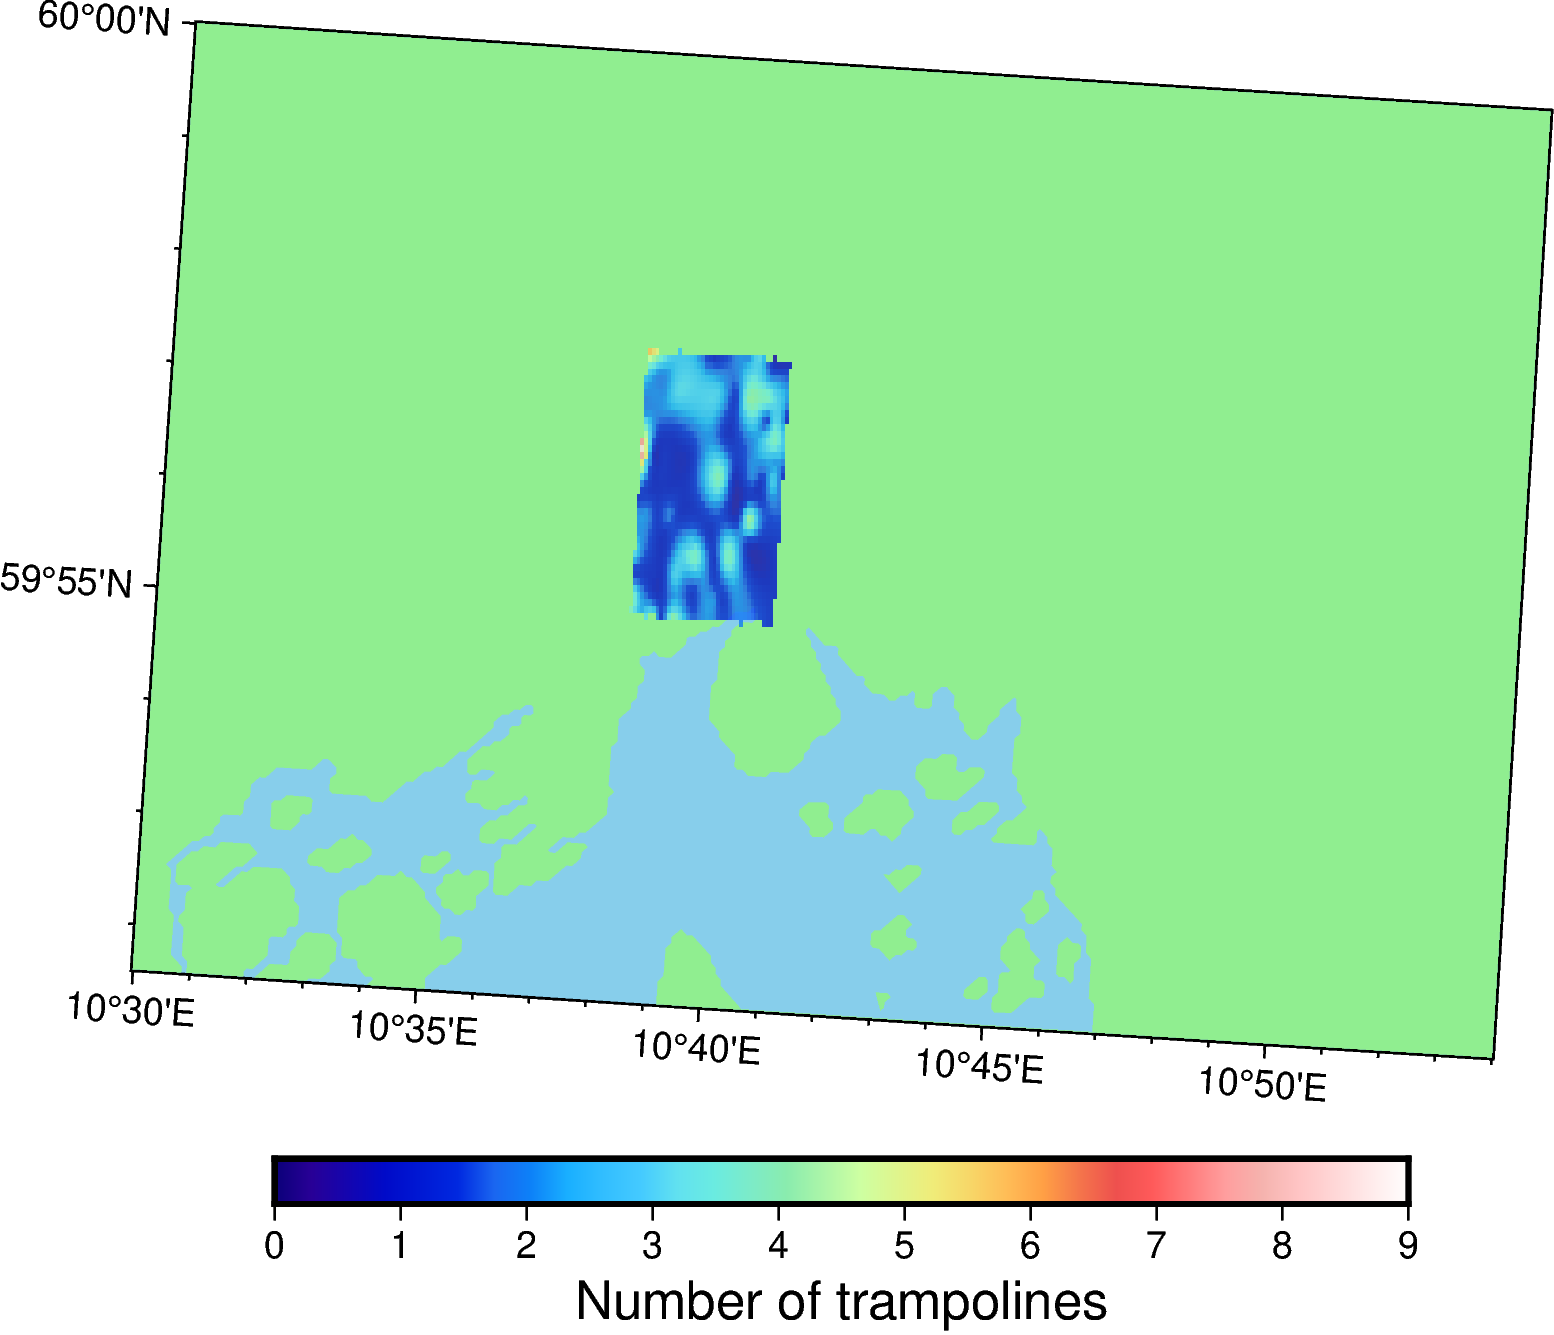

<Figure size 432x288 with 0 Axes>

In [171]:
region = [df.long.min(),
df.long.max(),
df.lat.min(),
df.lat.max(), ]

#pygmt.sph2grd(data=df[['lat', 'long']])
trampoline_surface = pygmt.surface(data=df[['long', 'lat', 'count']], R=region, I=0.001)

fig = pygmt.Figure()
fig.basemap(region=region_oslo, projection="U33R/12c", frame=True)
fig.coast(land="lightgreen", water="skyblue")
pygmt.makecpt(cmap="haxby", series=[0, df['count'].max()])
fig.grdimage(trampoline_surface, nan_transparent=True, transparency=20)
fig.colorbar(frame=["a1f1", 'x+l"Number of trampolines"', "y"])
#fig.plot(x=df.long, y=df.lat, style="c0.3c", color="white", pen="black")
plt.tight_layout()
fig.show()
fig.savefig('./figures/map.png', dpi=400)
